# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import RobustScaler
import time
import pickle
import os

import warnings
warnings.filterwarnings('ignore')

# Load and Inspect the Multimodal Dataset

In [2]:
df = pd.read_csv("Multimodal_EEG_HAR_Balanced_Final_v2.2.csv")

df

,Ch1_Std,Ch1_RMS,Ch1_Delta,Ch1_Theta,Ch1_Alpha,Ch1_Beta,Ch1_Gamma,Ch2_Std,Ch2_RMS,Ch2_Delta,...,Ch16_Alpha,Ch16_Beta,Ch16_Gamma,Accel X (g),Accel Y (g),Accel Z (g),Gyro X (°/s),Gyro Y (°/s),Gyro Z (°/s),Final_Activity_Label
0,1.171362e+01,1.171455e+01,1.545709e+02,1.136476e+01,1.352785e+00,1.840415e+00,1.897683e+00,1.138528e+02,1.161625e+02,1.276461e+04,...,159.724712,165.395052,161.945130,-7.141904,-2.889801,6.378153,-0.023213,-0.008552,-0.029322,Chair Squats
1,2.585113e-04,2.726944e-04,1.143008e-08,2.023924e-10,3.756345e-12,6.591203e-12,2.423963e-12,2.540486e+02,2.624816e+02,3.391425e+04,...,44.179222,510.635774,4.706429,-0.385466,-2.466028,9.612720,0.020769,-0.094073,0.079412,Chair Squats
2,3.779291e+01,3.772484e+01,5.814354e+02,1.142740e+01,1.991369e+00,1.036174e+02,2.511568e+02,7.059363e+02,7.255588e+02,2.937393e+05,...,29.077823,652.743966,448.898546,3.169923,-5.427655,5.046977,-1.687210,-0.260229,0.002443,Chair Squats
3,1.324673e+02,1.332910e+02,3.896453e+03,4.593790e+02,3.632279e+01,5.620181e+01,6.353971e+01,2.084299e+03,2.177075e+03,7.675029e+05,...,418.305849,1021.006955,1597.588525,3.581726,-0.373495,10.038888,-0.133169,-0.334754,-0.686613,Chair Squats
4,3.679947e-07,3.673028e-07,6.891314e-14,1.376034e-15,2.283754e-17,4.041542e-17,1.487656e-17,1.922527e+03,1.954525e+03,7.602498e+05,...,24.109394,814.032984,7.415880,0.246603,-0.916979,9.756372,0.173486,-0.080634,0.037874,Chair Squats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24616,1.798222e-08,1.795093e-08,2.721746e-16,9.829382e-18,2.947257e-20,4.538679e-20,1.677551e-20,3.178656e+02,3.237217e+02,2.340773e+04,...,60.886117,1364.060701,20.009147,-2.547430,-0.840365,9.009381,0.039095,0.084299,0.021991,Wall Push-ups
24617,2.386863e-08,2.387259e-08,4.697621e-16,1.929357e-17,4.626635e-20,8.093714e-20,2.982981e-20,1.607020e+02,1.606605e+02,1.361523e+04,...,36.299800,6.947727,4.777935,6.354211,-4.446033,5.861006,-0.018326,0.029322,-0.025656,Wall Push-ups
24618,1.619312e-08,1.672359e-08,1.371260e-16,4.282930e-18,2.274289e-20,3.600709e-20,1.321833e-20,3.252570e-08,3.310586e-08,8.275933e-16,...,24.014193,4.887524,3.170469,-4.113238,-0.577003,8.868123,-0.183260,0.437379,0.124617,Wall Push-ups
24619,1.838436e-08,1.839180e-08,3.543114e-16,7.661932e-18,3.097910e-20,5.423027e-20,1.984990e-20,1.757659e+00,1.817992e+00,1.945646e+00,...,86.728650,42.350096,62.033822,-2.571372,-0.746991,9.308656,0.043982,-0.007330,0.032987,Wall Push-ups


# Define Features and Target for Model

In [3]:
# HAR features (Accelerometer + Gyroscope)
har_features = ['Accel X (g)', 'Accel Y (g)', 'Accel Z (g)',
                'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)']

# EEG features (Top 101 most important features)
eeg_features = [
    'Ch11_Beta', 'Ch9_Beta', 'Ch10_Beta', 'Ch7_Beta', 'Ch16_Beta', 'Ch11_RMS',
    'Ch14_Beta', 'Ch13_Beta', 'Ch11_Std', 'Ch9_Std', 'Ch15_Std', 'Ch10_Std',
    'Ch7_RMS', 'Ch10_Theta', 'Ch15_Beta', 'Ch13_RMS', 'Ch10_Delta', 'Ch11_Delta',
    'Ch16_RMS', 'Ch7_Delta', 'Ch15_RMS', 'Ch10_RMS', 'Ch10_Alpha', 'Ch11_Gamma',
    'Ch9_RMS', 'Ch13_Std', 'Ch11_Alpha', 'Ch14_RMS', 'Ch11_Theta', 'Ch7_Theta',
    'Ch12_Beta', 'Ch6_RMS', 'Ch14_Delta', 'Ch7_Std', 'Ch5_Std', 'Ch6_Std',
    'Ch3_Beta', 'Ch16_Std', 'Ch3_RMS', 'Ch2_Beta', 'Ch8_Std', 'Ch13_Theta',
    'Ch5_RMS', 'Ch13_Gamma', 'Ch15_Delta', 'Ch13_Alpha', 'Ch8_Beta', 'Ch14_Std',
    'Ch7_Alpha', 'Ch6_Beta', 'Ch4_Std', 'Ch10_Gamma', 'Ch8_RMS', 'Ch3_Std',
    'Ch4_RMS', 'Ch13_Delta', 'Ch9_Delta', 'Ch9_Theta', 'Ch5_Delta', 'Ch16_Alpha',
    'Ch6_Delta', 'Ch14_Theta', 'Ch12_Std', 'Ch4_Alpha', 'Ch16_Theta', 'Ch16_Gamma',
    'Ch9_Alpha', 'Ch7_Gamma', 'Ch9_Gamma', 'Ch15_Alpha', 'Ch8_Alpha', 'Ch5_Beta',
    'Ch2_Alpha', 'Ch6_Gamma', 'Ch2_RMS', 'Ch14_Alpha', 'Ch12_Alpha', 'Ch4_Beta',
    'Ch15_Theta', 'Ch12_RMS', 'Ch4_Gamma', 'Ch12_Delta', 'Ch16_Delta', 'Ch12_Gamma',
    'Ch3_Gamma', 'Ch8_Delta', 'Ch6_Alpha', 'Ch3_Delta', 'Ch5_Gamma', 'Ch5_Theta',
    'Ch5_Alpha', 'Ch12_Theta', 'Ch2_Std', 'Ch15_Gamma', 'Ch2_Gamma', 'Ch8_Theta',
    'Ch4_Delta', 'Ch14_Gamma', 'Ch3_Alpha', 'Ch8_Gamma', 'Ch6_Theta'
]

target_col = 'Final_Activity_Label'

predictor_cols = har_features + eeg_features
X = df[predictor_cols].values
y = df[target_col].values

# Split Data into Train and Test Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=15, 
    stratify=y  
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (17234, 107), Test shape: (7387, 107)


# Train and Evaluate the Random Forest Classifier

===== Training and Inference Times =====
Training Time: 18.8570 seconds
Inference Time (for test set): 0.0947 seconds

===== Accuracy Scores =====
Training Accuracy: 0.9849
Test Accuracy: 0.9402

===== Stratified Cross-Validation Results =====
Stratified CV Accuracy (mean ± std): 0.9243 ± 0.0124
Training Set Accuracy: 0.9849
Test Set Accuracy: 0.9402

===== Classification Report =====
                             precision    recall  f1-score   support

               Chair Squats       0.88      0.96      0.92       686
   Light Stationary Cycling       0.96      0.97      0.96       567
          Marching in Place       0.97      0.95      0.96       763
        Seated Boxing Hooks       0.95      0.96      0.95       742
      Seated Leg Extensions       0.97      0.96      0.96       776
Seated Medicine Ball Twists       0.91      0.93      0.92       763
          Seated Side Bends       0.91      0.92      0.92       806
              Side-Stepping       0.93      0.95      0.94 

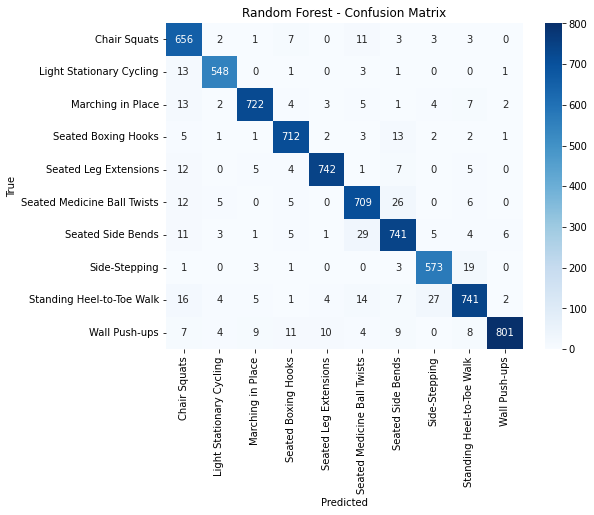

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ===================== Initialize with the best parameters =====================
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

# ============================ Train the Model ============================
start_train_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# ===================== Predictions on Test Data =====================
start_infer_time = time.time()
y_pred = rf_model.predict(X_test)
infer_time = time.time() - start_infer_time

# ========================== Calculate Accuracy =========================
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# ===================== Print Training and Inference Times =====================
print("===== Training and Inference Times =====")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Inference Time (for test set): {infer_time:.4f} seconds")

# ===================== Print Accuracy Scores =====================
print("\n===== Accuracy Scores =====")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# ===================== Stratified K-Fold Cross-Validation =====================
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# ===================== Print Stratified Cross-Validation Results =====================
print("\n===== Stratified Cross-Validation Results =====")
print(f"Stratified CV Accuracy (mean ± std): {cv_mean:.4f} ± {cv_std:.4f}")
print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# ===================== Classification Report =====================
print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred))

# ===================== Confusion Matrix =====================
conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, index=np.unique(y_test), columns=np.unique(y_test))

print("\n===== Confusion Matrix on Test Set =====")
print(df_conf_matrix)

# ======================= Plot Confusion Matrix ========================
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the Trained Random Forest Model

In [6]:
import pickle

with open("RF_HAR_EEG_Multimodal.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Random Forest model for HAR & EEG Multimodal has been successfully saved to 'RF_HAR_EEG_Multimodal.pkl'")

Random Forest model for HAR & EEG Multimodal has been successfully saved to 'RF_HAR_EEG_Multimodal.pkl'
